## Group Proposal

**Predicting whether an NBA player will make it to the All-Star team based on their performance statistics in the 2023 season using the 2021-2022 seasons.**


For our group proposal, we want to predict which NBA players will make it to the All-Star selections based on their performance. The NBA (National Basketball Association) is a professional basketball league in North America that features 30 teams. Each team consists of players who compete against each other in regular season games, with the goal of making it to the playoffs and eventually winning the NBA championship.

The NBA All-Star Game is an annual exhibition game that features the best players from each conference. The players are selected based on a combination of fan, player, and media voting. Being selected to the All-Star team is a significant accomplishment for NBA players and is often seen as a sign of their individual success and impact on the league.

The NBA tracks various performance statistics for each player, including points per game, rebounds per game, assists per game, field goal percentage, and many others. These statistics are used to evaluate a player's performance and value to their team.

In recent years, there has been an increasing interest in using machine learning and data analysis techniques to predict various outcomes in sports, including player performance, team success, and player awards such as All-Star selections. The NBA 2021-2022 per-game statistics dataset provides a rich source of data that can be used to build predictive models for various outcomes, including predicting whether a player will make it to the All-Star team in the 2023 season. 


In [1]:
### Loading of base packages manually 

library(datasets)   # loading of library datasets
library(tidyverse)  # loading of tidyverse library
library(tidymodels)
library(tibble)
library(httr)
options(repr.matrix.max.rows = 6)
# source('tests.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# Read the data from website
# URL of the team statistics page for the 2021-2022 NBA season and 2022-2023 NBA season.
# data pulled from: url1 <- "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"
#                   url2 <- "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"
basket_2023 <- read_csv("https://raw.githubusercontent.com/DrakenRaptor/Section006-28-Proposal/main/NBA%202022-2023(1).csv")
basket_2023

basket_2022 <- read_csv("https://raw.githubusercontent.com/DrakenRaptor/Section006-28-Proposal/main/2021-2022%20NBA.csv")
basket_2022

Rows: 644 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Player, Pos, Tm, Player-additional\
dbl (27): Rk, Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional\
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Precious Achiuwa,C,23,TOR,42,11,947,156,325,⋯,81,184,265,42,26,26,49,85,408,achiupr01\
2,Steven Adams,C,29,MEM,42,42,1133,157,263,⋯,214,271,485,97,36,46,79,98,361,adamsst01\
3,Bam Adebayo,C,25,MIA,61,61,2137,509,943,⋯,154,434,588,200,75,50,153,172,1295,adebaba01\
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
514,Trae Young,PG,24,ATL,58,58,2037,486,1137,⋯,44,129,173,585,65,9,237,86,1545,youngtr01\
515,Cody Zeller,C,30,MIA,7,0,96,14,22,⋯,11,8,19,5,1,3,5,17,42,zelleco01\
516,Ivica Zubac,C,25,LAC,61,61,1780,245,396,⋯,203,413,616,65,24,81,104,179,620,zubaciv01}


Rows: 813 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Sn, Player, Pos, Tm, Player-additional\
dbl (26): Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sn,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional\
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,⋯,146,327,473,82,37,41,84,151,664,achiupr01\
2,Steven Adams,C,28,MEM,76,75,1999,210,384,⋯,349,411,760,256,65,60,115,153,528,adamsst01\
3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,⋯,137,427,564,190,80,44,148,171,1068,adebaba01\
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
604,Cody Zeller,C,29,POR,27,0,355,51,90,⋯,50,75,125,22,8,6,19,56,140,zelleco01\
605,Ivica Zubac,C,24,LAC,76,76,1852,310,495,⋯,217,427,644,120,36,77,114,203,785,zubaciv01\
},NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
# Select the GS(Game Started), eFG%(Effective Field Goal Precentage), and PTS (Points Per Game) to be the three variables we will focused on in this assignment
selected_2023 <- basket_2023 |>
                 select(Player, GS, "eFG%", PTS) 
selected_2023

selected_2022 <- basket_2022 |>
                 select(Player, GS, "eFG%", PTS) 
selected_2022

Player,GS,eFG%,PTS
<chr>,<dbl>,<dbl>,<dbl>
Precious Achiuwa,11,0.512,408
Steven Adams,42,0.597,361
Bam Adebayo,61,0.540,1295
⋮,⋮,⋮,⋮
Trae Young,58,0.482,1545
Cody Zeller,0,0.636,42
Ivica Zubac,61,0.619,620


Player,GS,eFG%,PTS
<chr>,<dbl>,<dbl>,<dbl>
Precious Achiuwa,28,0.486,664
Steven Adams,75,0.547,528
Bam Adebayo,56,0.557,1068
⋮,⋮,⋮,⋮
Cody Zeller,0,0.567,140
Ivica Zubac,76,0.626,785
NA,NA,NA,NA


**Given that the datsets consists of various rows, there are various data that are not require for our analysis. Hence, we used select functions in R, to manipulate to give us 4 columns that we required: the Player name, GS, eFG%, Points as shown above.**

*The code as shown in the next cell was manually created to filter the names.* 

In [4]:
# Create a vector for basketball player that is all-star in 2023
all_stars_2023 <- c("Kyrie Irving", "Donovan Mitchell", "Giannis Antetokounmpo", "Kevin Durant", "Jayson Tatum", "Jaylen Brown", 
                  "DeMar DeRozan", "Tyrese Haliburton", "Jrue Holiday", "Julius Randle", "Bam Adebayo", "Joel Embiid", "Pascal Siakam", 
                  "Stephen Curry", "Luka Dončić", "Nikola Jokić", "Lebron James", "Zion Williamson", "Shai Gilgeous-Alexander", "Damian Lillard", 
                  "Ja Morant", "Paul George", "Jaren Jackson Jr.", "Lauri Markkanen", "Domantas Sabonis","Anthony Edwards", "De'Aaron Fox")
all_stars_2023

# Create a vector for basketball player that is all-star in 2022
all_stars_2022 <- c("Stephen Curry", "LeBron James", "Giannis Antetokounmpo", "DeMar DeRozan", "Nikola Jokić", "Luka Dončić", 
                    "Darius Garland", "Jarrett Allen", "Fred VanVleet", "Jimmy Butler", "Chris Paul", "Joel Embiid", "Jayson Tatum", 
                    "Trae Young", "Ja Morant", "Andrew Wiggins", "Devin Booker", "Dejounte Murray", "LaMelo Ball", "Khris Middleton", 
                    "Karl-Anthony Towns", "Rudy Gobert", "Zach LaVine")         
all_stars_2022

# Mutate a new column to determine the player is all-star or not.
basket_2023_mutate <- selected_2023 |>
    mutate(all_star = "No")

basket_2022_mutate <- selected_2022 |>
    mutate(all_star = "No")

print(basket_2023_mutate, n = 10)
print(basket_2022_mutate, n = 10)

[1] "Kyrie Irving"            "Donovan Mitchell"       
 [3] "Giannis Antetokounmpo"   "Kevin Durant"           
 [5] "Jayson Tatum"            "Jaylen Brown"           
 [7] "DeMar DeRozan"           "Tyrese Haliburton"      
 [9] "Jrue Holiday"            "Julius Randle"          
[11] "Bam Adebayo"             "Joel Embiid"            
[13] "Pascal Siakam"           "Stephen Curry"          
[15] "Luka Dončić"             "Nikola Jokić"           
[17] "Lebron James"            "Zion Williamson"        
[19] "Shai Gilgeous-Alexander" "Damian Lillard"         
[21] "Ja Morant"               "Paul George"            
[23] "Jaren Jackson Jr."       "Lauri Markkanen"        
[25] "Domantas Sabonis"        "Anthony Edwards"        
[27] "De'Aaron Fox"

[1] "Stephen Curry"         "LeBron James"          "Giannis Antetokounmpo"
 [4] "DeMar DeRozan"         "Nikola Jokić"          "Luka Dončić"          
 [7] "Darius Garland"        "Jarrett Allen"         "Fred VanVleet"        
[10] "Jimmy Butler"          "Chris Paul"            "Joel Embiid"          
[13] "Jayson Tatum"          "Trae Young"            "Ja Morant"            
[16] "Andrew Wiggins"        "Devin Booker"          "Dejounte Murray"      
[19] "LaMelo Ball"           "Khris Middleton"       "Karl-Anthony Towns"   
[22] "Rudy Gobert"           "Zach LaVine"

# A tibble: 644 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            11  0.512   408 No      
 2 Steven Adams                42  0.597   361 No      
 3 Bam Adebayo                 61  0.54   1295 No      
 4 Ochai Agbaji                 6  0.558   232 No      
 5 Santi Aldama                18  0.567   562 No      
 6 Nickeil Alexander-Walker     3  0.582   287 No      
 7 Nickeil Alexander-Walker     3  0.591   228 No      
 8 Nickeil Alexander-Walker     0  0.55     59 No      
 9 Grayson Allen               59  0.581   648 No      
10 Jarrett Allen               60  0.651   869 No      
# … with 634 more rows
# A tibble: 813 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            28  0.486   664 No      
 2 Steven Adams                75  0.547   528 No      
 3 Bam Adebayo                 56  0.557 

In [5]:
# Change the value of the all-stars column for all-star players in 2023 to true
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Kyrie Irving"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Donovan Mitchell"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Giannis Antetokounmpo"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Kevin Durant"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jayson Tatum"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jaylen Brown"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "DeMar DeRozan"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Tyrese Haliburton"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jrue Holiday"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Julius Randle"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Bam Adebayo"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Joel Embiid"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Pascal Siakam"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Stephen Curry"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Luka Dončić"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Nikola Jokić"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "LeBron James"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Zion Williamson"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Shai Gilgeous-Alexander"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "De'Aaron Fox"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Anthony Edwards"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Domantas Sabonis"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Lauri Markkanen"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jaren Jackson Jr."] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Paul George"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Ja Morant"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Damian Lillard"] = "Yes"
print(basket_2023_mutate, n = 10)

# A tibble: 644 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            11  0.512   408 No      
 2 Steven Adams                42  0.597   361 No      
 3 Bam Adebayo                 61  0.54   1295 Yes     
 4 Ochai Agbaji                 6  0.558   232 No      
 5 Santi Aldama                18  0.567   562 No      
 6 Nickeil Alexander-Walker     3  0.582   287 No      
 7 Nickeil Alexander-Walker     3  0.591   228 No      
 8 Nickeil Alexander-Walker     0  0.55     59 No      
 9 Grayson Allen               59  0.581   648 No      
10 Jarrett Allen               60  0.651   869 No      
# … with 634 more rows


In [6]:
# Change the value of the all-stars column for all-star players in 2022 to true
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Stephen Curry"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "LeBron James"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Giannis Antetokounmpo"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "DeMar DeRozan"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Nikola Jokić"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Luka Dončić"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Darius Garland"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Jarrett Allen"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Fred VanVleet"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Jimmy Butler"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Chris Paul"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Joel Embiid"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Jayson Tatum"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Trae Young"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Ja Morant"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Andrew Wiggins"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Devin Booker"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Dejounte Murray"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "LaMelo Ball"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Khris Middleton"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Karl-Anthony Towns"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Rudy Gobert"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Zach LaVine"] = "Yes"

print(basket_2022_mutate, n = 10)

# A tibble: 813 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            28  0.486   664 No      
 2 Steven Adams                75  0.547   528 No      
 3 Bam Adebayo                 56  0.557  1068 No      
 4 Santi Aldama                 0  0.424   132 No      
 5 LaMarcus Aldridge           12  0.566   607 No      
 6 Nickeil Alexander-Walker    21  0.449   692 No      
 7 Nickeil Alexander-Walker    19  0.45    639 No      
 8 Nickeil Alexander-Walker     2  0.438    53 No      
 9 Grayson Allen               61  0.588   733 No      
10 Jarrett Allen               56  0.678   904 Yes     
# … with 803 more rows


In [7]:
# Identify duplicated rows based on column x
duplicated_player_2023 <- duplicated(basket_2023_mutate$Player) | duplicated(basket_2023_mutate$Player, fromLast = TRUE)
duplicated_player_2022 <- duplicated(basket_2022_mutate$Player) | duplicated(basket_2022_mutate$Player, fromLast = TRUE)
# Exclude duplicated rows
basket_2023_np <- subset(basket_2023_mutate, !duplicated_player_2023)
basket_2022_np <- subset(basket_2022_mutate, !duplicated_player_2022)
# table(df_new$Player)
table(basket_2023_np$all_star)
table(basket_2022_np$all_star)


 No Yes 
427  25 


 No Yes 
486  23 

In [8]:

# Reverse sort
z <- basket_2023_mutate[order(basket_2023_mutate$Player, basket_2023_mutate$PTS, decreasing=TRUE),]

# Keep only the first row for each duplicate of z$id; this row will have the
# largest value for z$var
z <- z[!duplicated(z$Player),]

# Sort so it looks nice
z <- z[order(z$Player, z$PTS),]
print(z, n = 30)

z <- filter(z, all_star == "Yes")
print(z, n = 30)

# A tibble: 516 × 5
   Player                             GS `eFG%`   PTS all_star
   <chr>                           <dbl>  <dbl> <dbl> <chr>   
 1 "A.J. Green"                        0  0.625   139 No      
 2 "A.J. Lawson"                       0  0.635    34 No      
 3 "Aaron Gordon"                     53  0.626   897 No      
 4 "Aaron Holiday"                     5  0.5     213 No      
 5 "Aaron Nesmith"                    45  0.509   548 No      
 6 "Aaron Wiggins"                    13  0.571   365 No      
 7 "Admiral Schofield"                 0  0.589   129 No      
 8 "AJ Griffin"                       11  0.566   527 No      
 9 "Al Horford"                       51  0.629   501 No      
10 "Alec Burks"                        8  0.544   652 No      
11 "Aleksej Pokusevski"               25  0.519   273 No      
12 "Alex Caruso"                      24  0.54    309 No      
13 "Alex Len"                          1  0.5      13 No      
14 "Alize Johnson"                 

In [9]:
# Calculate the propotion between all-star player and normal player
prop.table(table(basket_2023_np$all_star))
prop.table(table(basket_2022_np$all_star))
table(basket_2023_np$all_star)
table(basket_2022_np$all_star)


        No        Yes 
0.94469027 0.05530973 


        No        Yes 
0.95481336 0.04518664 


 No Yes 
427  25 


 No Yes 
486  23 

In [10]:
asfactor_all_star <- basket_2023_mutate |>
                     mutate(all_star = as_factor(all_star)) |>
                     rename(effective_field_goal = "eFG%", points = PTS, games_started= GS, player = Player) 
asfactor_all_star

player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Precious Achiuwa,11,0.512,408,No
Steven Adams,42,0.597,361,No
Bam Adebayo,61,0.540,1295,Yes
⋮,⋮,⋮,⋮,⋮
Trae Young,58,0.482,1545,No
Cody Zeller,0,0.636,42,No
Ivica Zubac,61,0.619,620,No


In [11]:
split <- initial_split(asfactor_all_star, prop = 0.75, strata = all_star) 
new_obs_training <- training(split)
new_obs_training
new_obs_testing <- testing(split)
new_obs_testing

player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Precious Achiuwa,11,0.512,408,No
Steven Adams,42,0.597,361,No
Nickeil Alexander-Walker,3,0.582,287,No
⋮,⋮,⋮,⋮,⋮
Trae Young,58,0.482,1545,No
Cody Zeller,0,0.636,42,No
Ivica Zubac,61,0.619,620,No


player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Bam Adebayo,61,0.540,1295,Yes
Ochai Agbaji,6,0.558,232,No
Santi Aldama,18,0.567,562,No
⋮,⋮,⋮,⋮,⋮
Jalen Williams,47,0.568,795,No
James Wiseman,0,0.633,145,No
McKinley Wright IV,1,0.510,57,No


In [12]:
#summary statistics
#let's try to figure out which of the variables will be the best predictor for our target variable. 
#we'll group by the games started by each player and find they're mean points per game

summary <- new_obs_training |>
           group_by(games_started) |> 
           summarize(mean_points = mean(points))
summary


#this shows that the higher the number of games started, the higher the average number of points scored per game, 
#increasing such a player's chances of making it into the all star selections.

games_started,mean_points
<dbl>,<dbl>
0,95.81169
1,145.55000
2,177.44000
⋮,⋮
65,1093
66,1185
67,1674


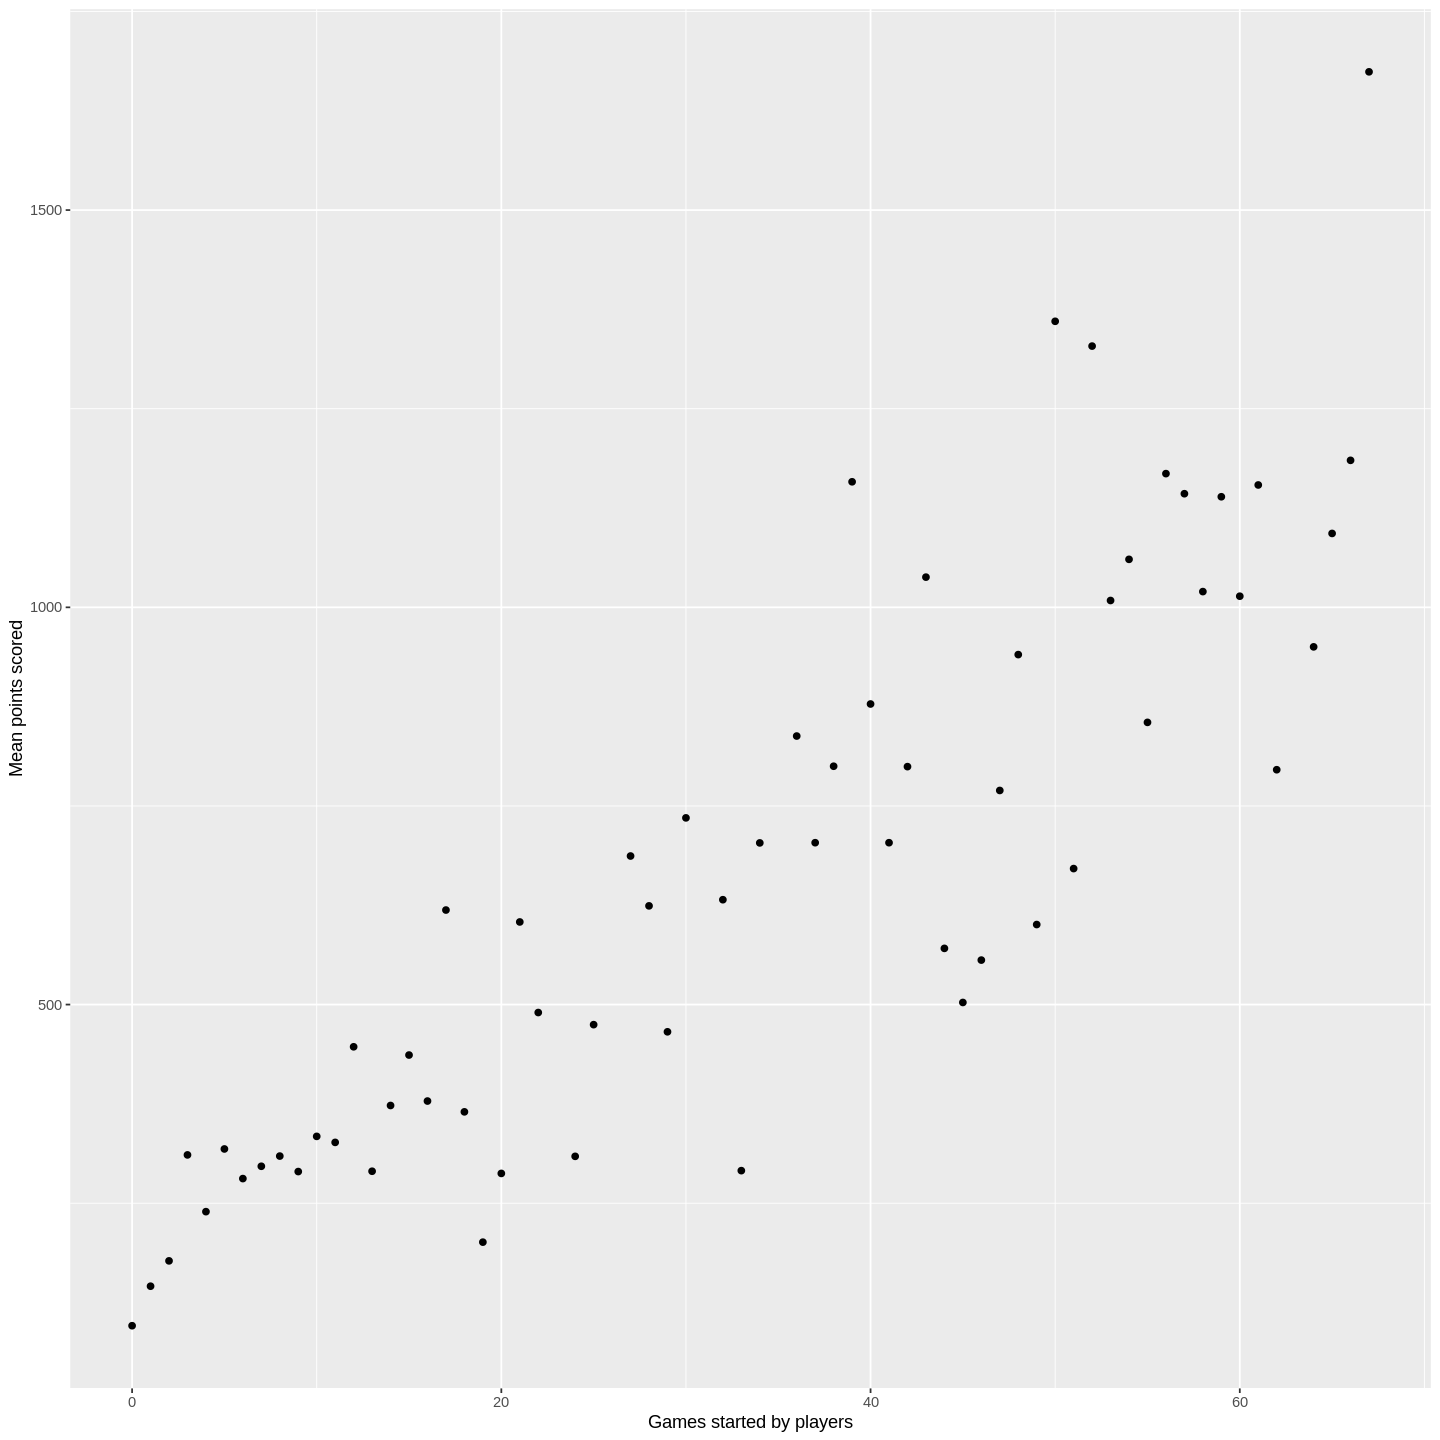

In [14]:
options(repr.plot.width = 12, repr.plot.height = 12)
#let's plot games started against the mean number of points to visualize this 
gs_against_meanpts <- summary |>
                      ggplot(aes(x = games_started, y= mean_points)) +
                      geom_point() +
                      labs(x= "Games started by players", y= "Mean points scored")
gs_against_meanpts

In [18]:
#let's group by all star players, and find the mean points scored 
summary1 <- new_obs_training |>
            group_by(all_star) |> 
            summarize(mean_points = mean(points))
summary1

#here we can see that players who got selected as all star players have higher points per game on average. 

all_star,mean_points
<fct>,<dbl>
No,346.8031
Yes,1337.7692


In [22]:
#let's group by the points scored by the players and see the relationship between it and the effective field goal 
summary2 <- new_obs_training |>
            group_by(points) |> 
            summarize(mean_efg = mean(effective_field_goal))
summary2


points,mean_efg
<dbl>,<dbl>
0,NA
2,0.5500000
3,0.5475714
⋮,⋮
1731,0.564
1745,0.532
1851,0.537


In [ ]:
#we don't see any relationship between them 

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'PTS' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(obj

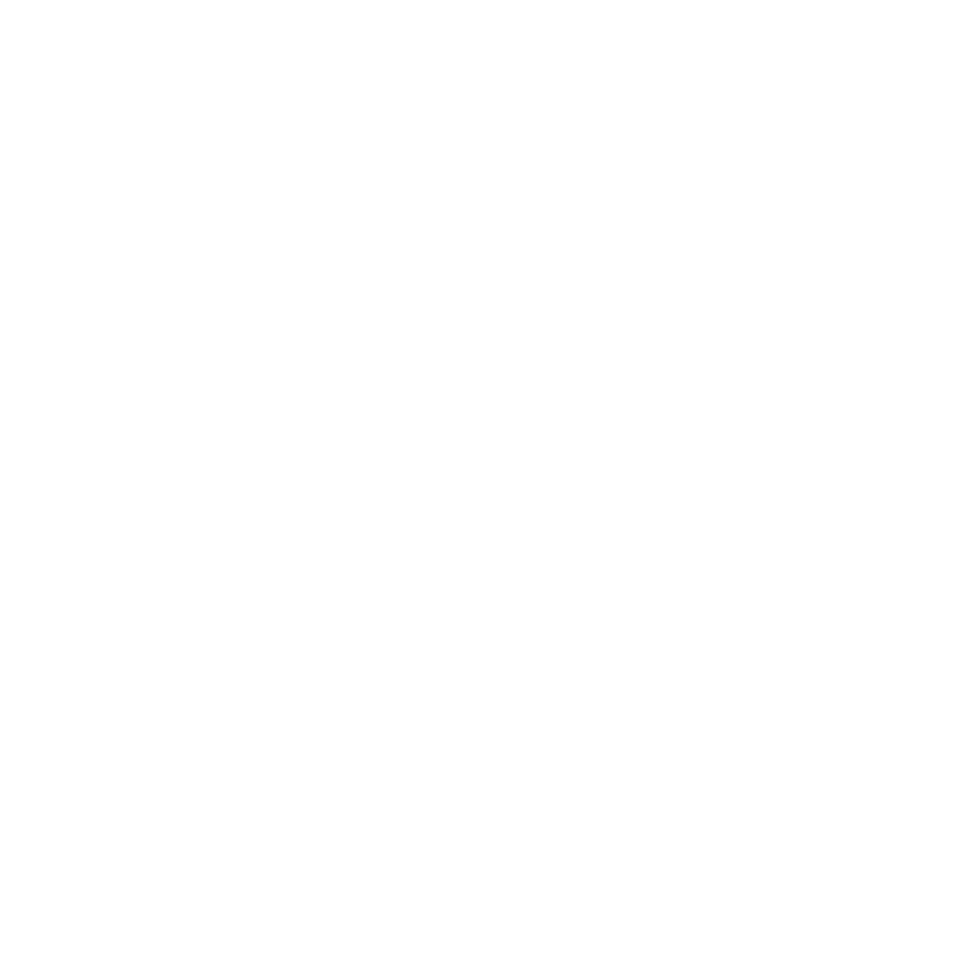

In [15]:
options(repr.plot.width = 8, repr.plot.height = 8) 

position_plot <- new_obs_training |>
    ggplot(aes(x = PTS, y = `eFG%`, color = Player)) +
    geom_point() +
    labs(x = "Points", y = "eFG%", color = "Position", title = "Points vs Position") +
    theme(text = element_text(size = 20))

position_plot

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'PTS' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(obj

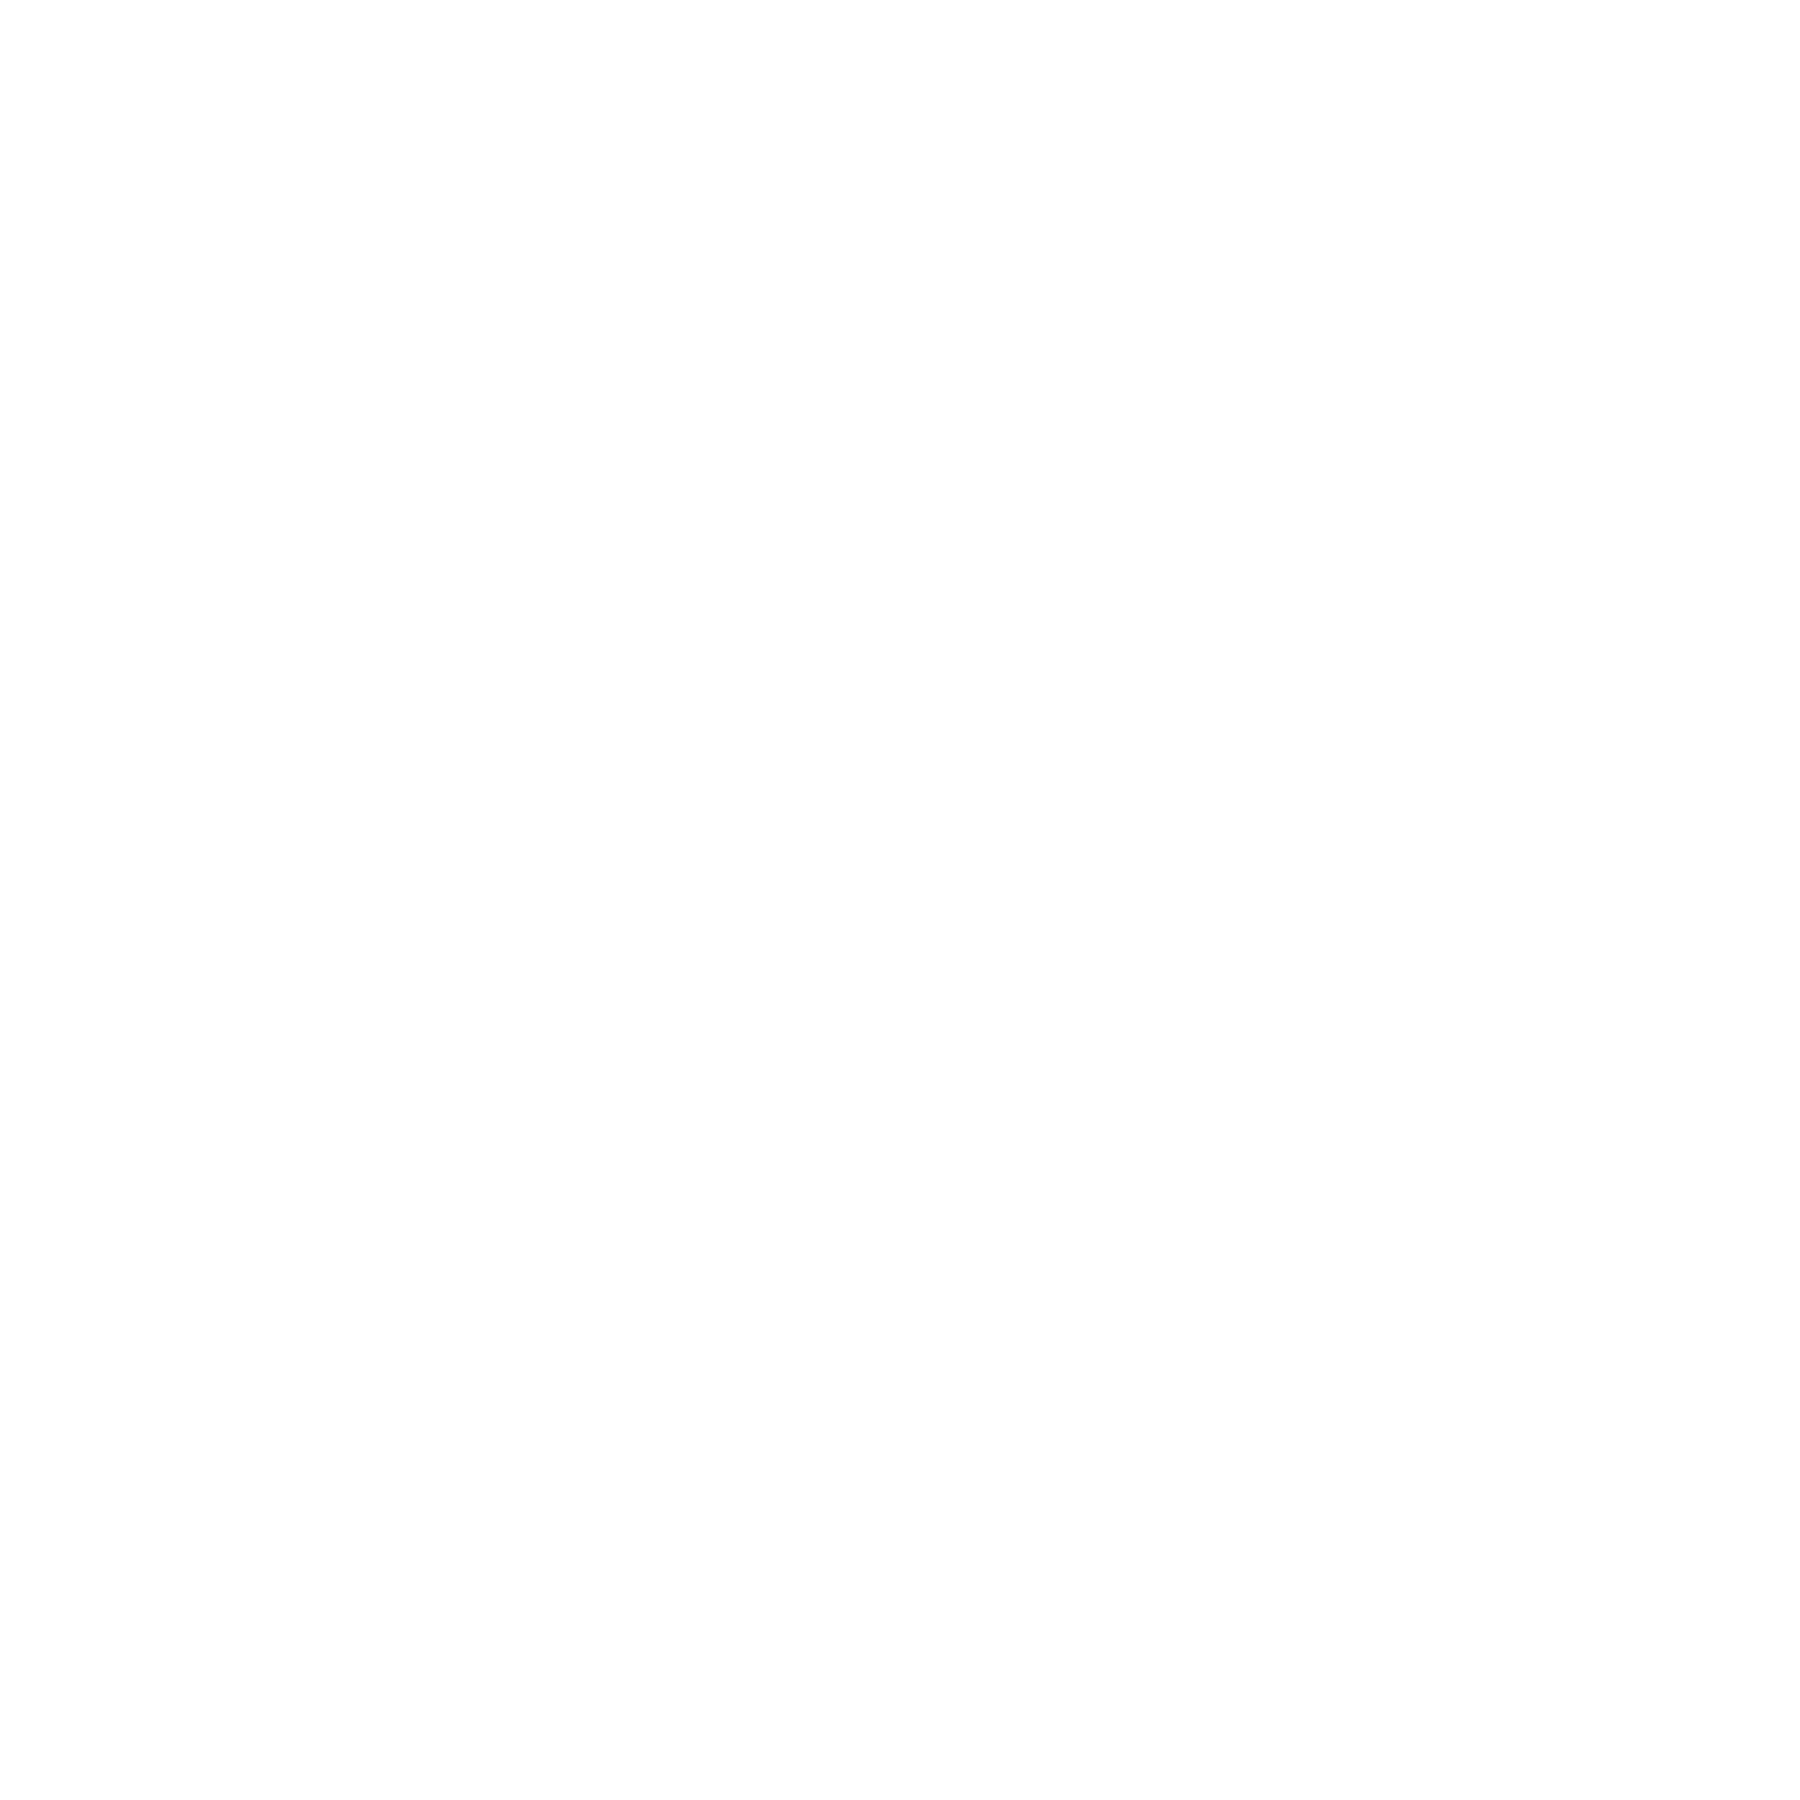

In [16]:
options(repr.plot.width = 15, repr.plot.height = 15) 

rk_plot <- new_obs_training |>
    ggplot(aes(x = PTS, y = GS)) +
    geom_point(alpha = 0.8) +
    labs(x = "Points", y = "GS", color = "Position", title = "Age vs Pos") +
    theme(text = element_text(size = 20))

rk_plot

Rk, PTS, GS, FG%
<font color = "blue"> Our research will be predicting whether an NBA player will make it to the All-Star Team based on their performance statisitics in the 2023 season. Based Based on 2021-2022 years dataset, mutate a new column all star(binary, yes or no), select three variables, make the predictive model, split to train-test dataset, verify accuracy, retest on 2023 data
</font>